# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 1 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

## Esercizio 01.1: <span style="color:brown"> Test sul generatore di numeri casuali </span>
Si caricano i risultati della simulazione (valori medi ed incertezze) e si riportano i relativi grafici.

### Parte 1: Media

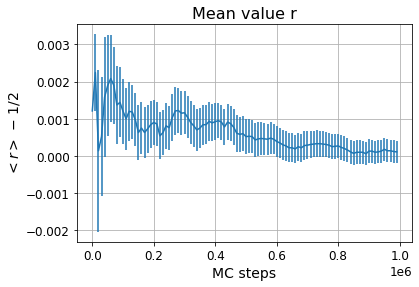

In [2]:
x, sum_prog, err_prog = np.loadtxt('r.dat', dtype=float, unpack='true')
L = 10000
x *= L #Number of throws = block * (Number of throws in each block)

#make plot
plt.errorbar(x, sum_prog-0.5, yerr=err_prog)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title(f'Mean value r', size=16)
plt.xlabel(f'MC steps')
plt.ylabel(f'$<r>\,-\,1/2$')
plt.grid(True)
plt.show()

### Parte 2: Varianza

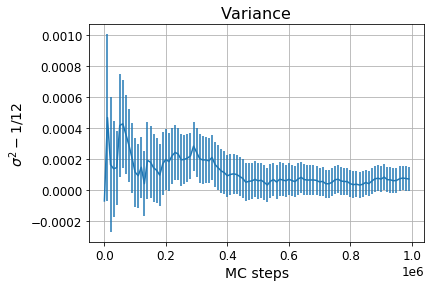

In [3]:
x_sigma, sum_prog_sigma, err_prog_sigma = np.loadtxt('sigma2.dat', dtype=float, unpack='true') 
x_sigma *= L

#make plot
plt.errorbar(x_sigma, sum_prog_sigma-1./12., yerr=err_prog_sigma)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title(f'Variance', size=16)
plt.xlabel(f'MC steps')
plt.ylabel('$\sigma^2-1/12$')
plt.grid(True)
plt.show()

### Parte 3: Chi-Quadrato $\chi^2$

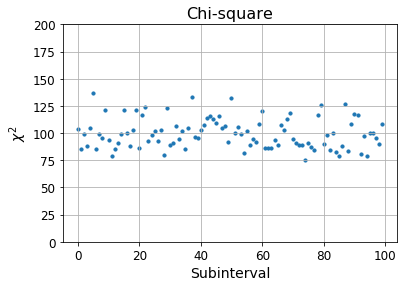

In [4]:
chi_2 = np.loadtxt('chi2.dat', dtype=float) #100 values of chi2
x_i = np.array([i for i in range(len(chi_2))])

plt.scatter(x_i, chi_2, s=10)
plt.title(f'Chi-square', size=16)
plt.ylim([0,200])
plt.xlabel(f'Subinterval')
plt.ylabel(r'$\chi^2$')
plt.grid(True)
plt.show()

Si osserva che sia la media che la varianza, riportate nei grafici precedenti, sono in linea con i valori ricavabili dalla teoria.\
Per quanto riguarda il test del $\chi^2$, si vede che in media in valori oscillano intorno al valore atteso (**100**) e quindi il generatore restituisce effettivamente numeri (pseudo)casuali uniformemente distribuiti.

## Esercizio 01.2: <span style="color:brown"> Teorema del Limite Centrale </span>

Si riportano i risultati delle simulazioni per la somma delle variabili estratte dalle distribuzioni: *uniforme, esponenziale e Cauchy-Lorentz*.\
Le somme sono calcolate per: **$N = 1,N = 2, N = 10, N = 100$** e nell'ultimo caso si esegue anche un fit sugli istogrammi per verificare che sia rispettato il teorema del limite centrale (per le distribuzioni uniforme ed esponenziale).

### Caso N = 1

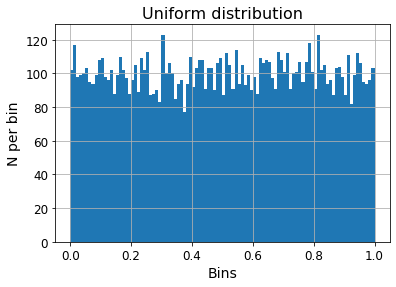

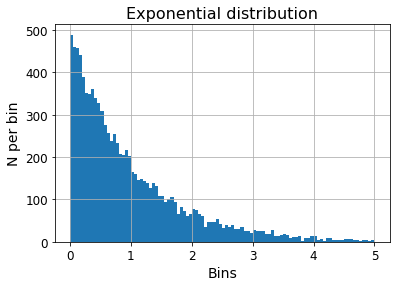

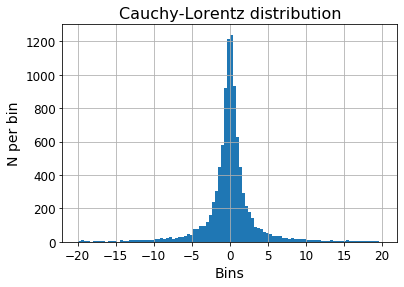

In [5]:
unif, exp, lor = np.loadtxt('clt1.dat', dtype=float, unpack='true') #pdf

#make histograms
plt.hist(unif, bins=100)
plt.title(f'Uniform distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

plt.hist(exp, bins=100, range=(0,5))
plt.title(f'Exponential distribution', size=16)
plt.xlabel(f'Bins')
plt.ylabel(f'N per bin')
plt.grid(True)
plt.show()

plt.hist(lor, bins=100, range=(-20,20))
plt.title(f'Cauchy-Lorentz distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

### Caso N = 2

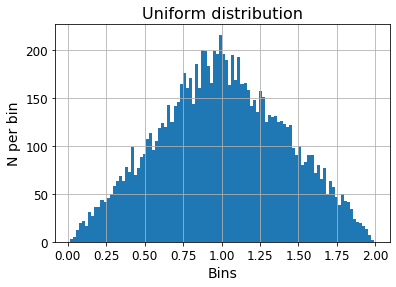

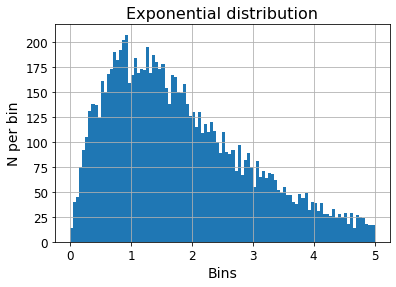

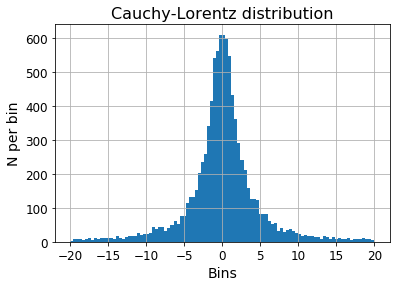

In [6]:
unif, exp, lor = np.loadtxt('clt2.dat', dtype=float, unpack='true') #pdf

#make histograms
plt.hist(unif,bins=100)
plt.title(f'Uniform distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

plt.hist(exp, bins=100, range=(0,5))
plt.title(f'Exponential distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

plt.hist(lor, bins=100, range=(-20,20))
plt.title(f'Cauchy-Lorentz distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

### Caso N = 10

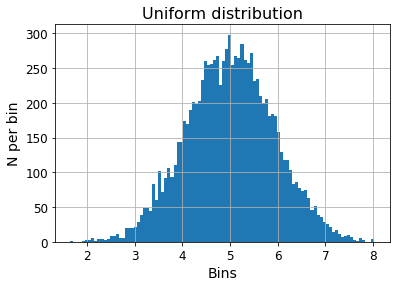

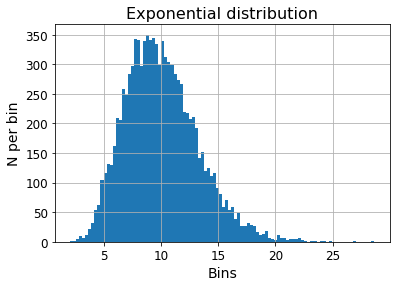

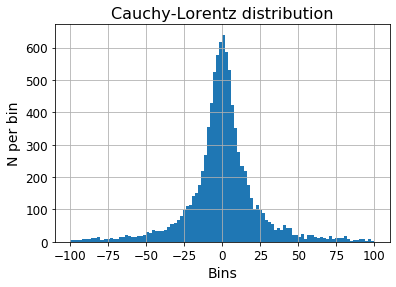

In [7]:
unif, exp, lor = np.loadtxt('clt10.dat', dtype=float, unpack='true') #pdf

#make histogram
plt.hist(unif, bins=100)
plt.title(f'Uniform distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

plt.hist(exp, bins=100)
plt.title(f'Exponential distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

plt.hist(lor, bins=100, range=(-100,100))
plt.title(f'Cauchy-Lorentz distribution', size=16)
plt.xlabel('Bins')
plt.ylabel('N per bin')
plt.grid(True)
plt.show()

### Caso N = 100

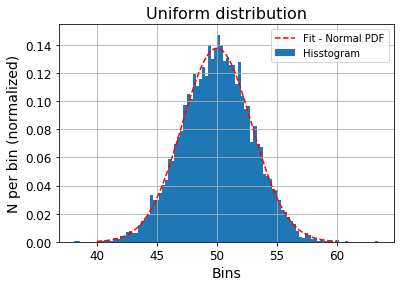

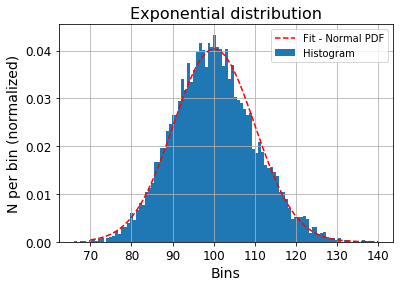

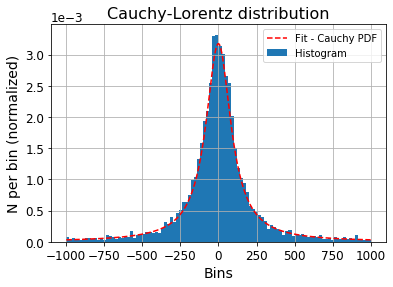

In [8]:
unif, exp, lor = np.loadtxt('clt100.dat', dtype=float, unpack='true') #pdf

#fit histogram with pdf
mean, std = norm.fit(unif)
mean1, std1 = norm.fit(exp)
loc, scale = cauchy.fit(lor)

x_appo = np.linspace(40, 60, 100)
y_appo = norm.pdf(x_appo, mean, std)
x_appo1 = np.linspace(70, 140, 100)
y_appo1 = norm.pdf(x_appo1, mean1, std1)
x_appo2 = np.linspace(-1000, 1000, 1000)
y_appo2 = cauchy.pdf(x_appo2, loc, scale)

#fit parameters
#print(mean, std)
#print(mean1, std1)
#print(loc, scale)

#make histograms
plt.hist(unif, bins=100, density=True, label='Hisstogram') 
plt.plot(x_appo, y_appo,'k', color='red', linestyle='--', linewidth=1.5, label='Fit - Normal PDF')
plt.title(f'Uniform distribution', size=16)
plt.xlabel(f'Bins')
plt.ylabel(f'N per bin (normalized)')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

plt.hist(exp, bins=100, density=True, label='Histogram')
plt.plot(x_appo1, y_appo1, 'k', color='red', linestyle='--',linewidth=1.5, label='Fit - Normal PDF')
plt.title(f'Exponential distribution', size=16)
plt.xlabel(f'Bins')
plt.ylabel(f'N per bin (normalized)')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

plt.hist(lor, bins=100, range=(-1000,1000), density=True, label='Histogram')
plt.plot(x_appo2, y_appo2, 'k', color='red', linestyle='--', linewidth=1.5, label='Fit - Cauchy PDF')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.title(f'Cauchy-Lorentz distribution', size=16)
plt.xlabel(f'Bins')
plt.ylabel(f'N per bin (normalized)')
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

**Osservazione**: Per il caso **$N = 100$** i risultati ottenuti dai fit sono in linea con l'enuciato del *teorema del limite centrale*: la distribuzione uniforme e quella esponenziale convergono ad una gaussiana (valor medio $N\mu$ e varianza $N\sigma^2$), mentre la distribuzione di Cauchy-Lorentz non soddisfa le ipotesi del CLT ed è stabile, quindi rimane uguale a sé stessa (stessa media, ma cambia la varianza).

## Esercizio 01.3: <span style="color:brown"> Problema dell'ago di Buffon </span>

Si riportano i risultati della simulazione Monte Carlo per l'esperimento dell'ago di Buffon, in cui sono state usate linee a distanza **$d = 1$** e aghi di lunghezza $L = 0.5$.\
Per eseguire la simulazione non è stato utilizzato il valore di $\pi$, modo da non farlsare i risultati finali.

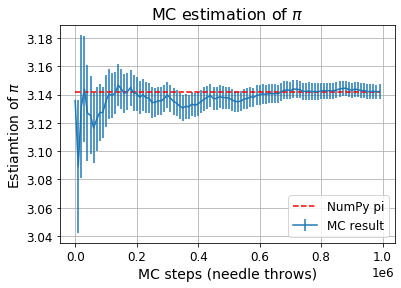

In [9]:
x_i, pi_mean, pi_stddev = np.loadtxt('pi.dat', dtype=float, unpack='true')
x_i *= 10000 

plt.errorbar(x_i, pi_mean, yerr=pi_stddev, label='MC result')
plt.hlines(y=np.pi, xmin=0, xmax=x_i[-1], linestyles='dashed', color='red', label='NumPy pi')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title(f'MC estimation of $\pi$', size=16)
plt.xlabel(f'MC steps (needle throws)')
plt.ylabel(f'Estiamtion of $\pi$')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

Si osserva che il risultato è pienamente compatibile con il valore accettato (in questo caso il valore utilizzato nella libreria NumPy).